In [1]:
# Import Dependencies
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# Women's E-Commerce Clothing Reviews Dataset
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=0)

data.head(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses


<AxesSubplot:>

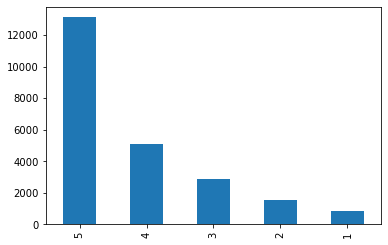

In [2]:
#  It is obvious that the dataset is massively unbalanced
data['Rating'].value_counts().plot(kind='bar')

In [3]:
# Correlation heatmap
# sns.heatmap(data.corr(), annot=True)

In [4]:
# Data Preprocessing

# Merge Title and Review Text
data['Review'] = data['Title'] + ' ' + data['Review Text']

# Dropping unneeded columns
data.drop(labels=['Clothing ID','Title','Review Text'], axis=1, inplace=True)

# Dropping columns with no reviews
data = data[~data['Review'].isnull()]

data.head(3)

,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Review
2,60,3,0,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,0,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,6,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Evan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Evan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<AxesSubplot:title={'center':'sentiment analysis'}>

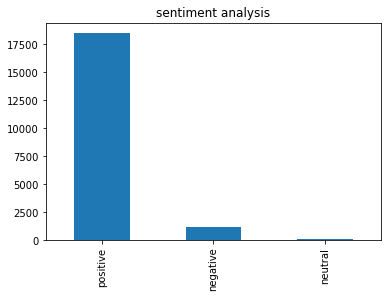

In [5]:
# Import NLP dependencies
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

# # tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
df = pd.DataFrame(columns=['Tokenized Reviews'])for reviews in data['Review']:	reviews = token.tokenize(reviews)	df = df.append({'Tokenized Reviews': reviews}, ignore_index=True)# cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
# text_counts= cv.fit_transform(data['Review Text'])


# Must clean up review text via tokenization, removing stopwords, etc.

analyzer = SentimentIntensityAnalyzer()

# Calculate polarity/sentiment scores from -1 to 1
data['score'] = data['Review'].apply(lambda Review: analyzer.polarity_scores(Review))
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound'])
# Classify each polarity score as strong negative, weak negative, 
# neutral, weak positive, and strong positive

data['sentiment_type']=''
## ** Error /w the code below you will get a blank column in the graph with values
# data.loc[data.compound <= -0.4, 'sentiment_type']='strong negative'
# data.loc[(data.compound < 0) & (data.compound >= -0.3), 'sentiment_type']='weak negative'
# data.loc[data.compound==0, 'sentiment_type']='neutral'
# data.loc[(data.compound > 0) & (data.compound <= 0.3), 'sentiment_type']='weak positive'
# data.loc[data.compound>=0.4, 'sentiment_type']='strong positive'

data.loc[data.compound<0, 'sentiment_type']='negative'
data.loc[data.compound==0, 'sentiment_type']='neutral'
data.loc[data.compound>0, 'sentiment_type']='positive'

#data.head(3)

data.sentiment_type.value_counts().plot(kind='bar',title="sentiment analysis")



Counter({4: 11528, 3: 4000, 2: 2029, 1: 1615, 0: 828})


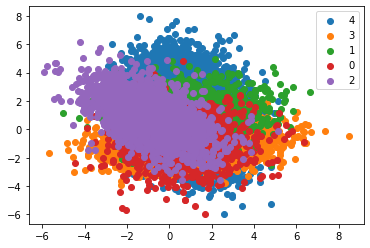

Counter({0: 828, 1: 828, 2: 828, 3: 828, 4: 828})


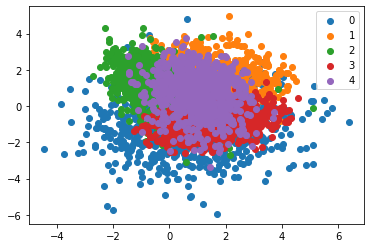

Counter({0: 828, 1: 828, 2: 828, 3: 828, 4: 828})


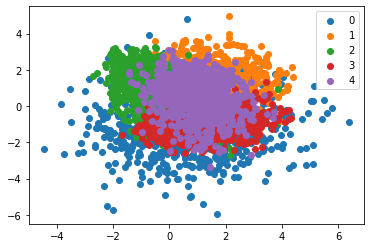

C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of

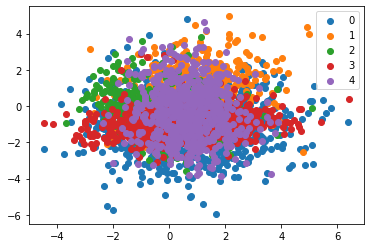

C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
C:\Users\Evan\anaconda3\imblearn\under_sampling\_prototype_selection\_nearmiss.py:188: UserWarning: The number of the samples to be selected is larger than the number of

Counter({0: 828, 3: 359, 4: 290, 1: 165, 2: 147})


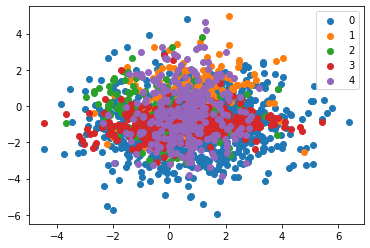

Counter({4: 10204, 3: 3492, 2: 1710, 1: 1089, 0: 828})


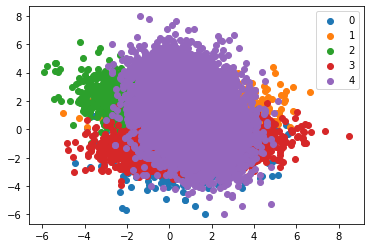

Counter({4: 9598, 3: 3248, 2: 1581, 1: 907, 0: 828})


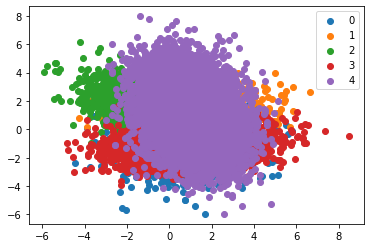

Counter({4: 1904, 3: 1649, 2: 1587, 1: 1578, 0: 828})


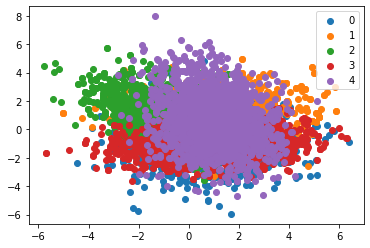

Counter({4: 1650, 3: 1614, 2: 1592, 1: 1587, 0: 828})


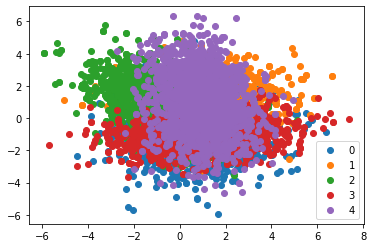

Counter({4: 1576, 3: 1276, 2: 1197, 1: 1186, 0: 828})


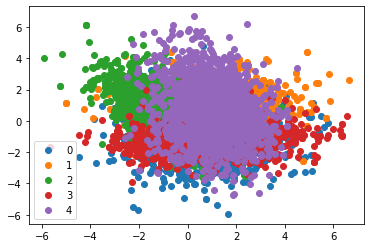

In [19]:
# Splitting Data into Train/Test
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import OneSidedSelection


X, y = make_classification(n_samples= 20000, n_features=8, n_informative=8, n_redundant=0, n_clusters_per_class=1, weights=[.04, .08, .1, .2, .58], n_classes=5)
#this splits our classification into 5 weighted groups with a distribution based on the rating score
#it assumes that all 8 features are informative (PLEASE CHANGE IF THIS IS NOT THE CASE BY ADJUSTING n_informative AND n_redundant)

counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
#this shows us our original distribution

undersample = NearMiss(version=2, n_neighbors=3) #this is how we get our sampling distribution; we can select the version and other parameters
X_1, y_1 = undersample.fit_resample(X, y)
counter = Counter(y_1)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_1 == label)[0]
	plt.scatter(X_1[row_ix, 0], X_1[row_ix, 1], label=str(label))
plt.legend()
plt.show()
#we are aiming to condense the scatterplot as much as possible

undersample = NearMiss(version=2, n_neighbors=10) 
X_2, y_2 = undersample.fit_resample(X, y)
counter = Counter(y_2)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_2 == label)[0]
	plt.scatter(X_2[row_ix, 0], X_2[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = NearMiss(version=3, sampling_strategy='all') #this version of Near Miss wil return imbalanced classifications
X_3, y_3 = undersample.fit_resample(X, y)
counter = Counter(y_3)
for label, _ in counter.items():
	row_ix = where(y_3 == label)[0]
	plt.scatter(X_3[row_ix, 0], X_3[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = NearMiss(version=3, n_neighbors_ver3=1, sampling_strategy='all') #this is the most robust result from NM, but also the least balanced
X_4, y_4 = undersample.fit_resample(X, y)
counter = Counter(y_4)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_4 == label)[0]
	plt.scatter(X_4[row_ix, 0], X_4[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = EditedNearestNeighbours(n_neighbors=3) #ENN returns highly imbalanced classifications, but they seem to be very robust
X_5, y_5 = undersample.fit_resample(X, y)
counter = Counter(y_5)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_5 == label)[0]
	plt.scatter(X_5[row_ix, 0], X_5[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = EditedNearestNeighbours(n_neighbors=5) #seems like a lower number of NN is more effective
X_6, y_6 = undersample.fit_resample(X, y)
counter = Counter(y_6)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_6 == label)[0]
	plt.scatter(X_6[row_ix, 0], X_6[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=1600)
X_7, y_7 = undersample.fit_resample(X, y)
counter = Counter(y_7)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_7 == label)[0]
	plt.scatter(X_7[row_ix, 0], X_7[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = OneSidedSelection(n_neighbors=3, n_seeds_S=1600)
X_8, y_8 = undersample.fit_resample(X, y)
counter = Counter(y_8)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_8 == label)[0]
	plt.scatter(X_8[row_ix, 0], X_8[row_ix, 1], label=str(label))
plt.legend()
plt.show()

undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=1200)
X_9, y_9 = undersample.fit_resample(X, y)
counter = Counter(y_9)
print(counter)
for label, _ in counter.items():
	row_ix = where(y_9 == label)[0]
	plt.scatter(X_9[row_ix, 0], X_9[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#Personally, I'm most confident in distributions 5 and 8 -Evan
